# Unique Value Classification

In [10]:
import mapclassify
import numpy
import libpysal
import geopandas
import distinctipy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas

mapclassify.__version__

'2.5.0'

In [11]:

gdf = geopandas.read_file(libpysal.examples.get_path('south.shp'))

In [12]:
gdf.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'STFIPS',
       'COFIPS', 'FIPSNO', 'SOUTH', 'HR60', 'HR70', 'HR80', 'HR90', 'HC60',
       'HC70', 'HC80', 'HC90', 'PO60', 'PO70', 'PO80', 'PO90', 'RD60', 'RD70',
       'RD80', 'RD90', 'PS60', 'PS70', 'PS80', 'PS90', 'UE60', 'UE70', 'UE80',
       'UE90', 'DV60', 'DV70', 'DV80', 'DV90', 'MA60', 'MA70', 'MA80', 'MA90',
       'POL60', 'POL70', 'POL80', 'POL90', 'DNL60', 'DNL70', 'DNL80', 'DNL90',
       'MFIL59', 'MFIL69', 'MFIL79', 'MFIL89', 'FP59', 'FP69', 'FP79', 'FP89',
       'BLK60', 'BLK70', 'BLK80', 'BLK90', 'GI59', 'GI69', 'GI79', 'GI89',
       'FH60', 'FH70', 'FH80', 'FH90', 'geometry'],
      dtype='object')

In [13]:
def unique_value_choropleth(gdf, column, figsize=(16, 9),
                           fontsize=17):
    counts = numpy.unique(gdf[column], return_counts=True)
    values = gdf[column].values
    colors = distinctipy.get_colors(len(counts[0]))
    df = pandas.DataFrame(data = {'label': counts[0], 'counts': counts[1],
                                  'color': colors})
    colors = [colors[numpy.where(counts[0]==i)[0][0]] for i in values]
    gdf.plot(color=colors, figsize=figsize)
    patch_list = []
    w = len(str(df.counts.max()))
    legend_dict = {}
    for index, row in df.iterrows():   
        entry = f'{row["counts"]:>{w}} {row["label"]}'
        #entries.append(entry)
        legend_dict[entry] = row['color']
        data_key = mpatches.Patch(color=row['color'], label=entry)
        patch_list.append(data_key)

    plt.legend(handles=patch_list, bbox_to_anchor=(1.7, 1),loc='upper right',
              fontsize=fontsize);
    plt.axis('off');

    

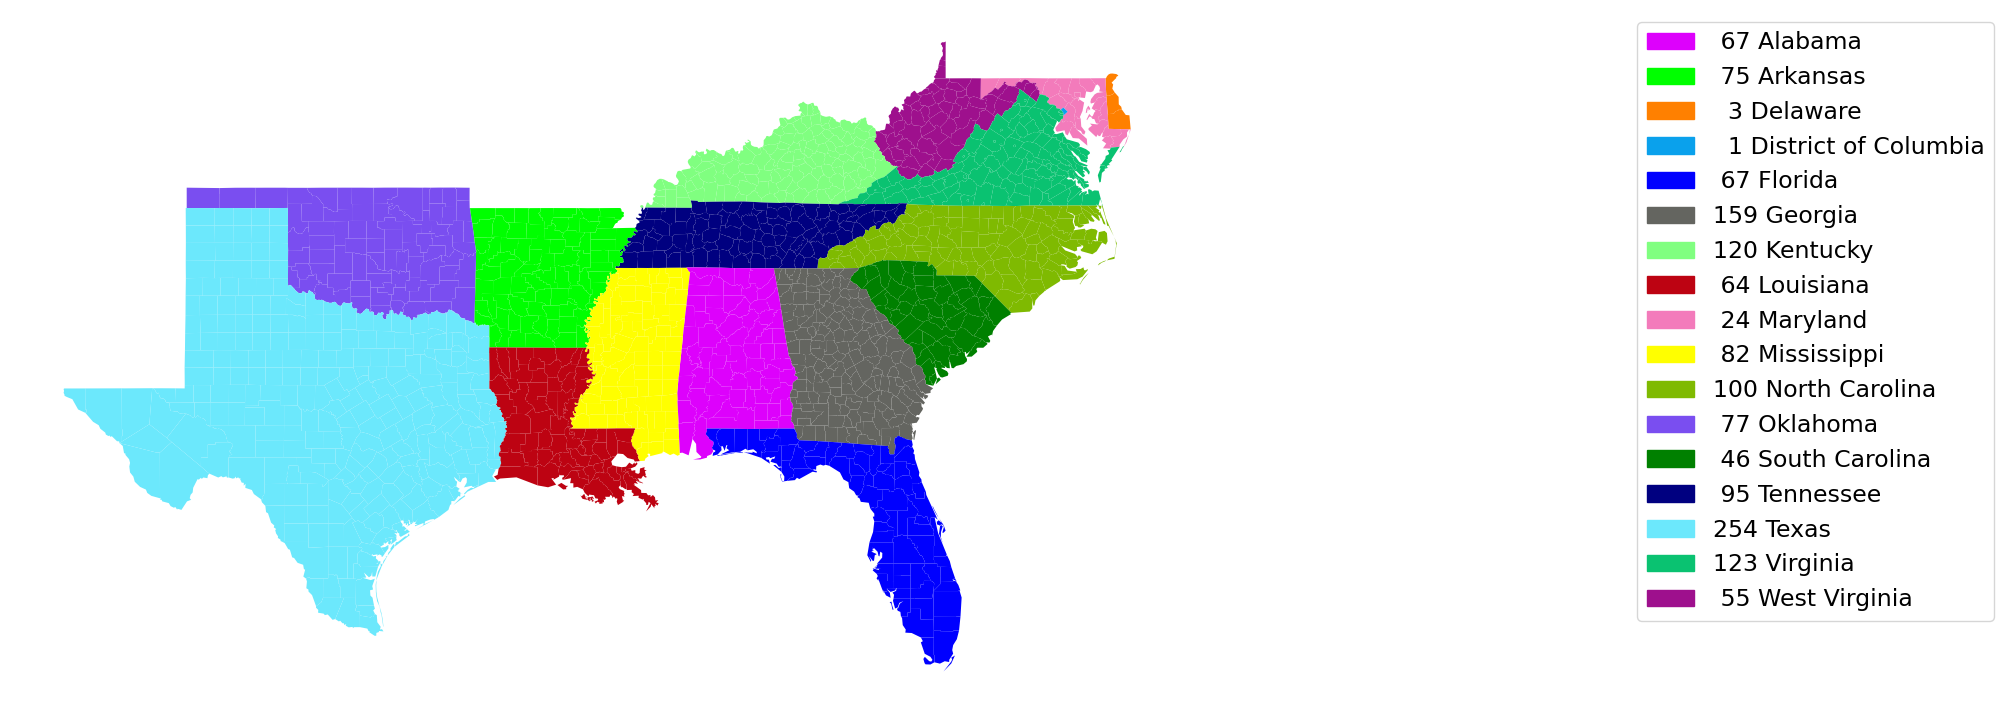

In [14]:
unique_value_choropleth(gdf, 'STATE_NAME')

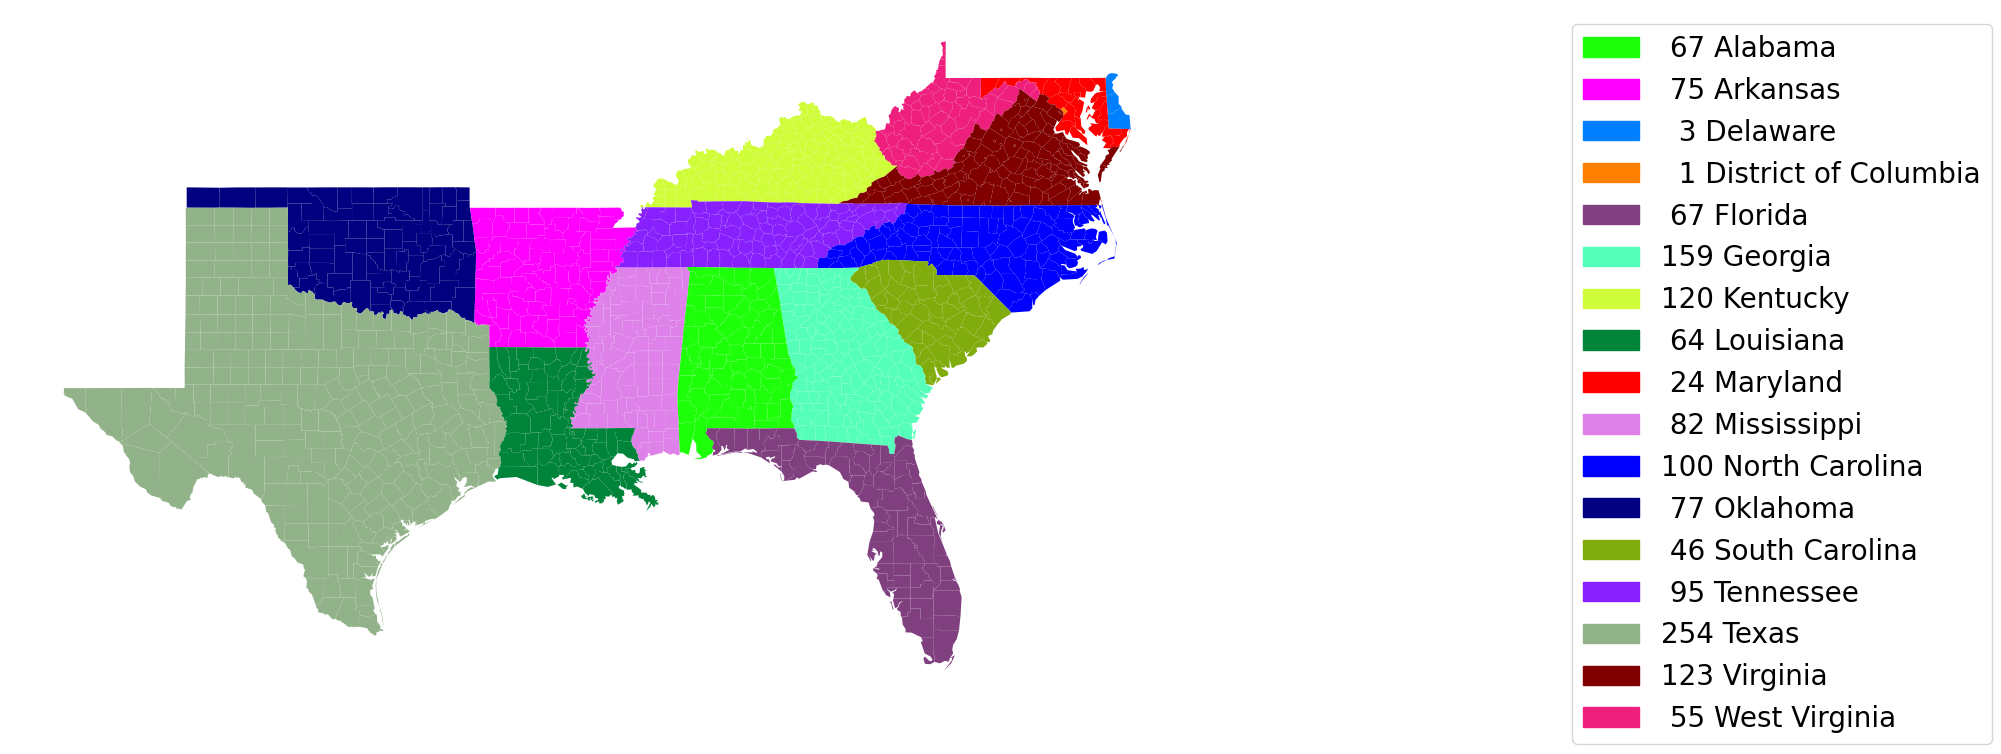

In [15]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20)

In [16]:
us = geopandas.read_file("/home/serge/Downloads/cb_2018_us_county_20m.shp")
us = us[us.STATEFP!='02']
us = us[us.STATEFP!='15']

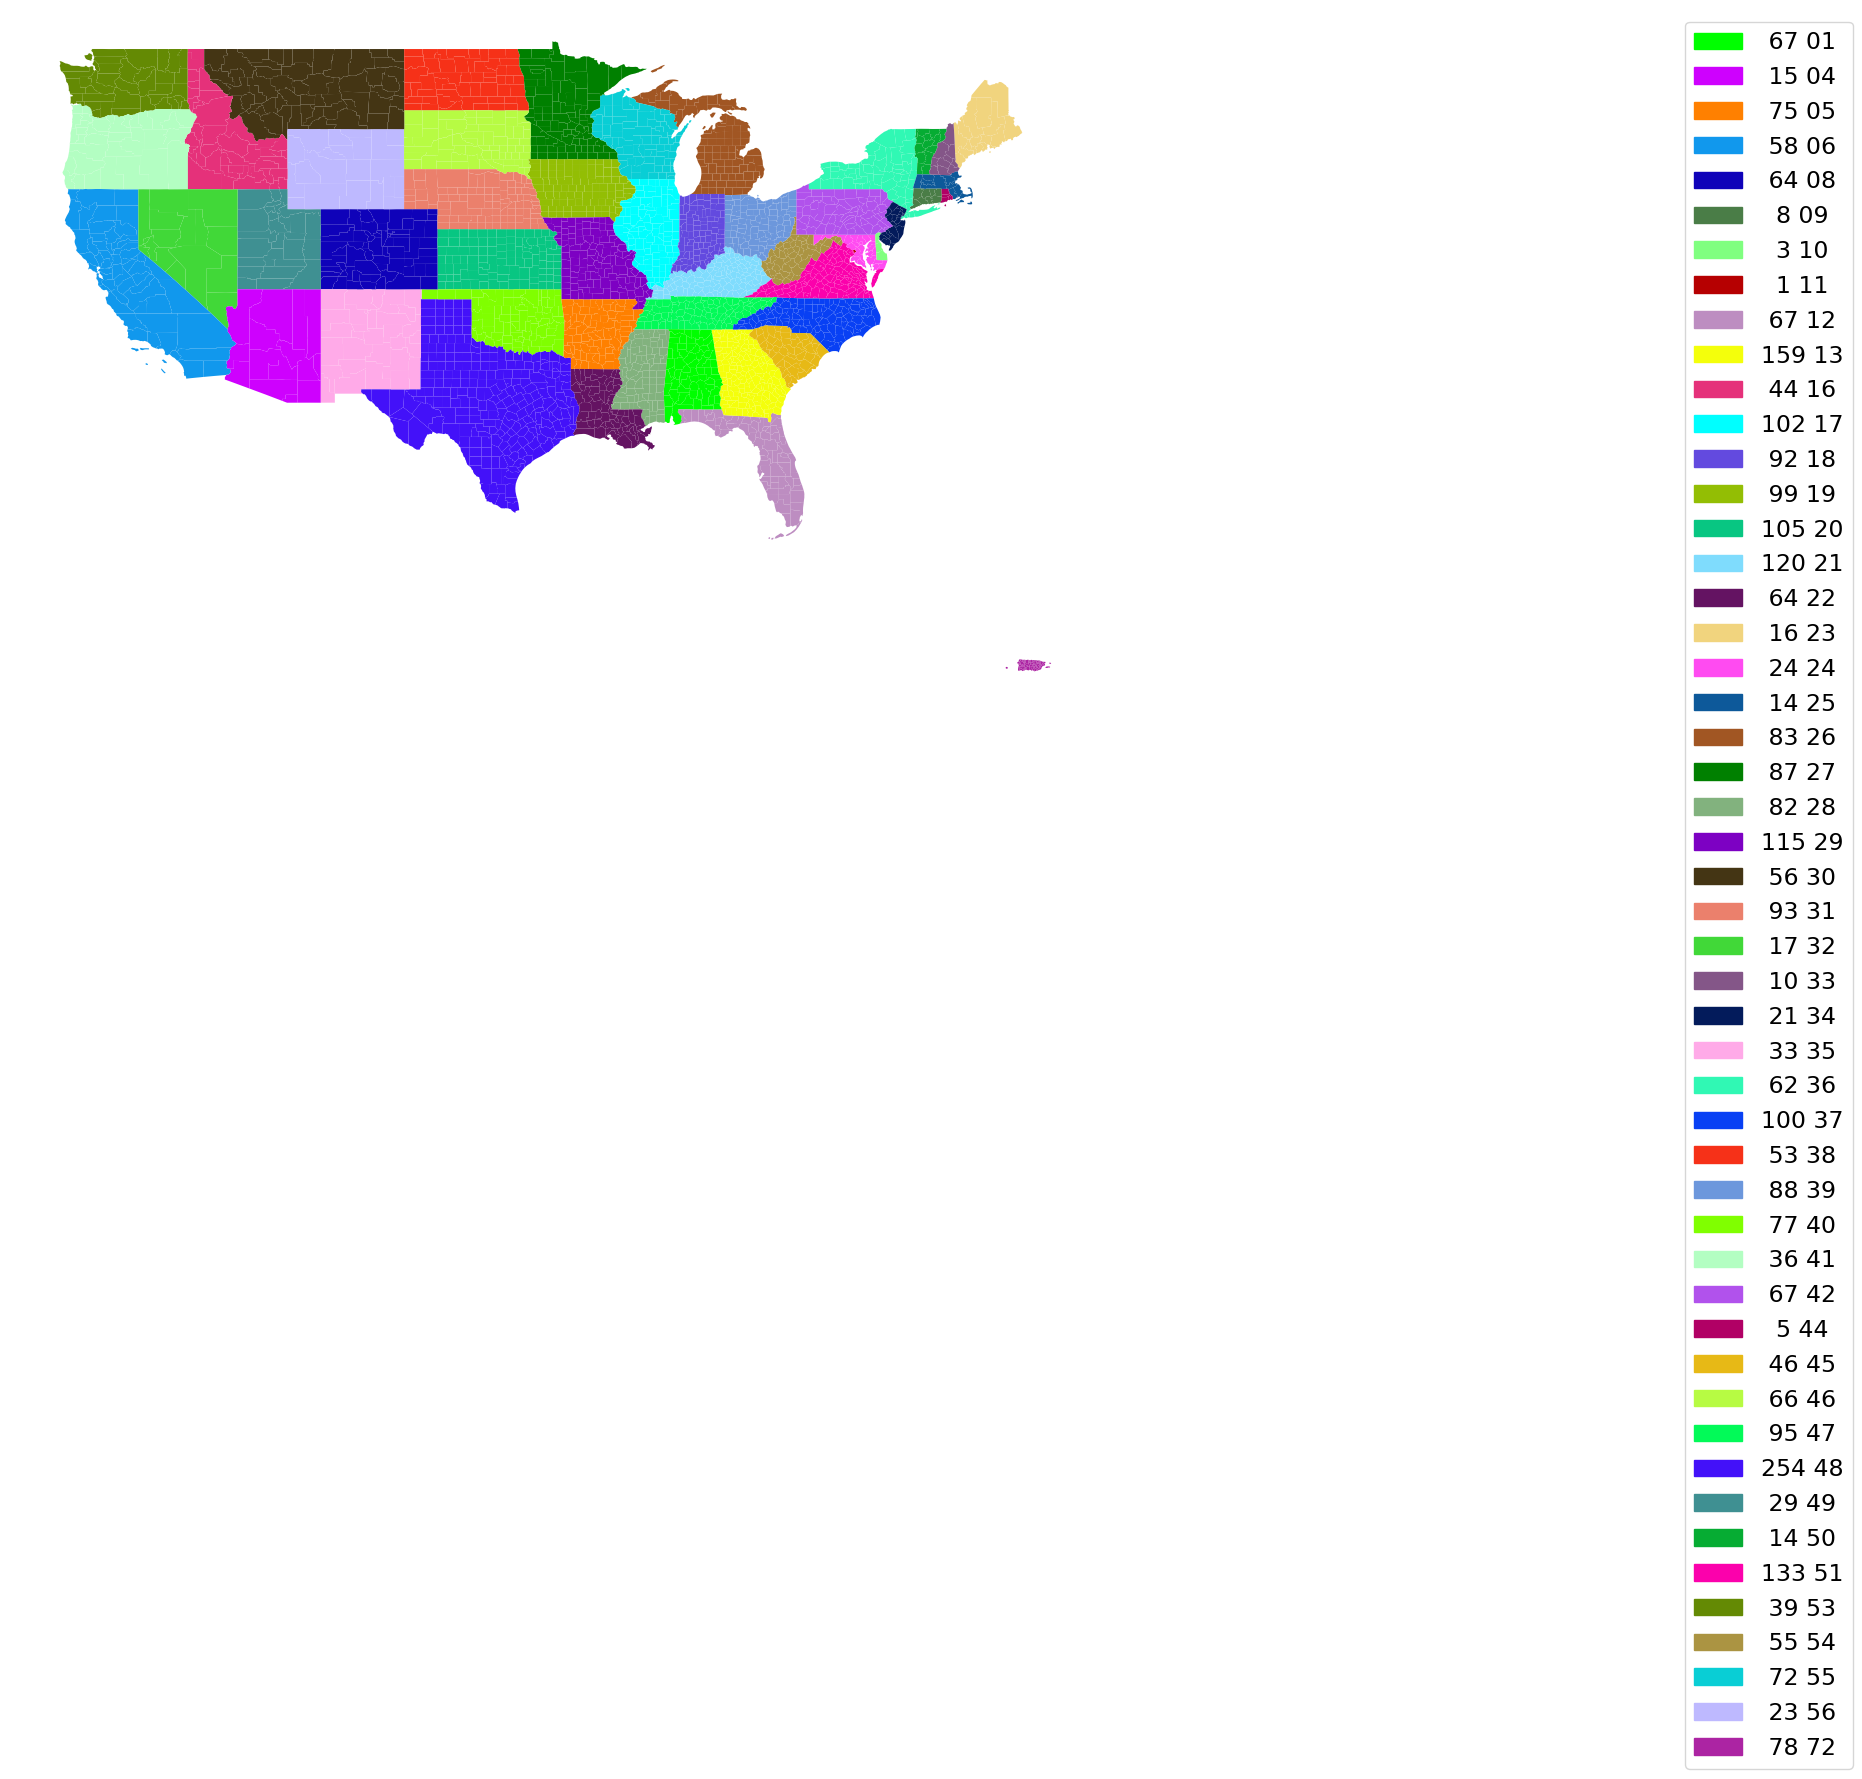

In [18]:
unique_value_choropleth(us, 'STATEFP')

In [21]:
def unique_value_choropleth(gdf, column, figsize=(16, 9),
                           fontsize=17):
    counts = numpy.unique(gdf[column], return_counts=True)
    values = gdf[column].values
    colors = distinctipy.get_colors(len(counts[0]))
    df = pandas.DataFrame(data = {'label': counts[0], 'counts': counts[1],
                                  'color': colors})
    colors = [colors[numpy.where(counts[0]==i)[0][0]] for i in values]
    gdf.plot(color=colors, figsize=figsize)
    patch_list = []
    w = len(str(df.counts.max()))
    legend_dict = {}
    for index, row in df.iterrows():   
        entry = f'{row["counts"]:>{w}} {row["label"]}'
        entry = f'{row["label"]} ({row["counts"]})'
        #entries.append(entry)
        legend_dict[entry] = row['color']
        data_key = mpatches.Patch(color=row['color'], label=entry)
        patch_list.append(data_key)

    plt.legend(handles=patch_list, bbox_to_anchor=(1.7, 1),loc='upper right',
              fontsize=fontsize);
    plt.axis('off');

    

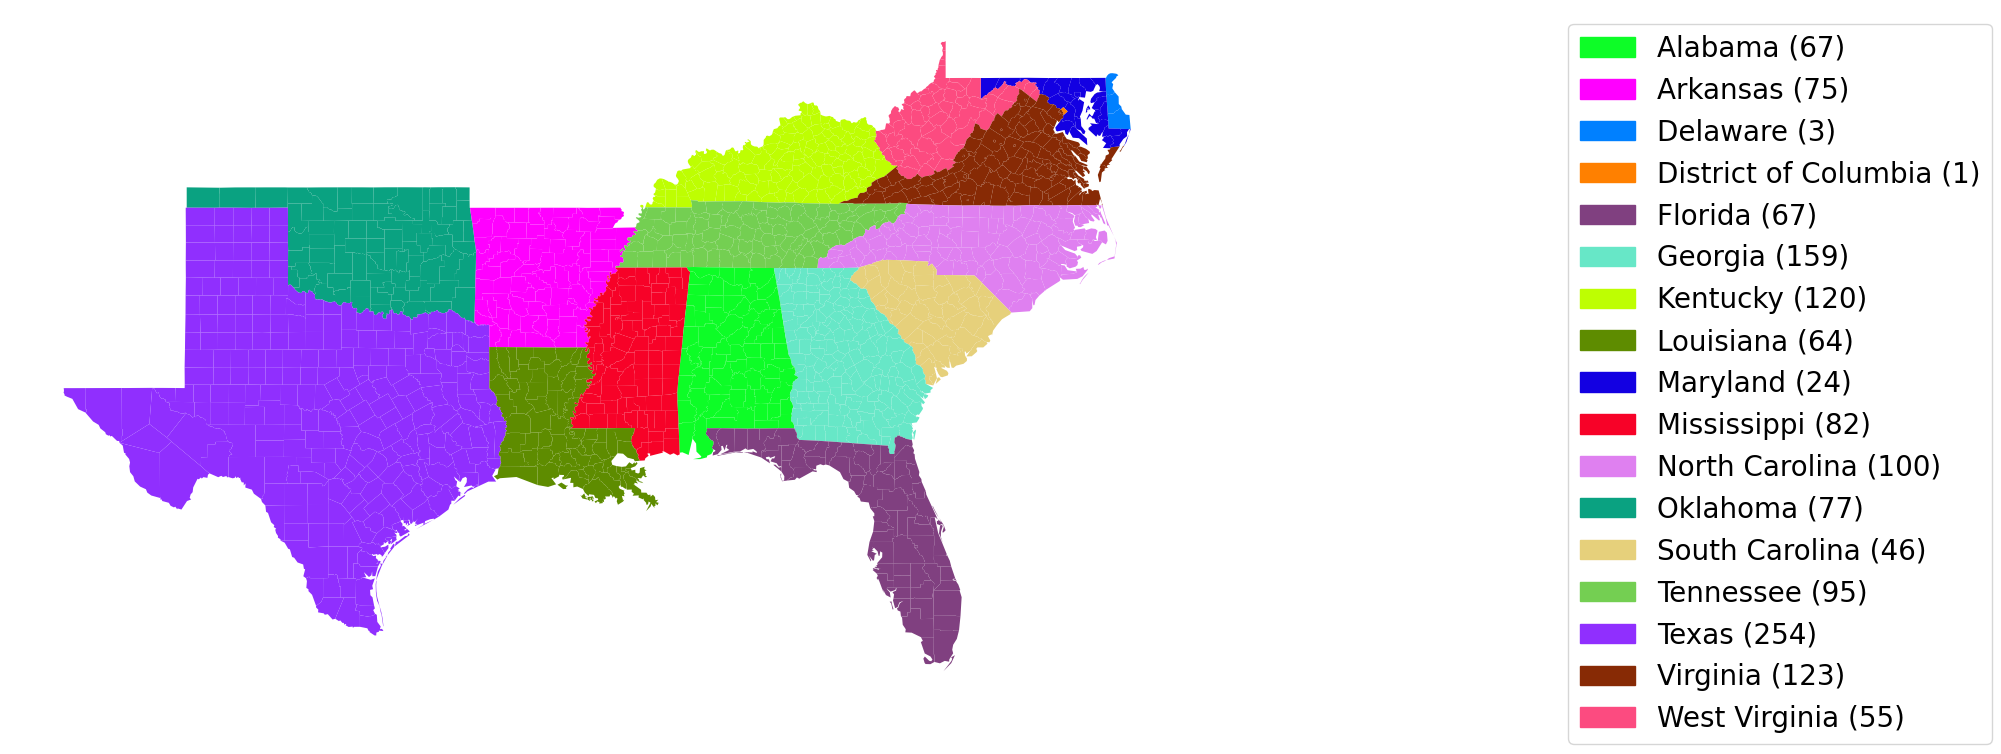

In [22]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20)

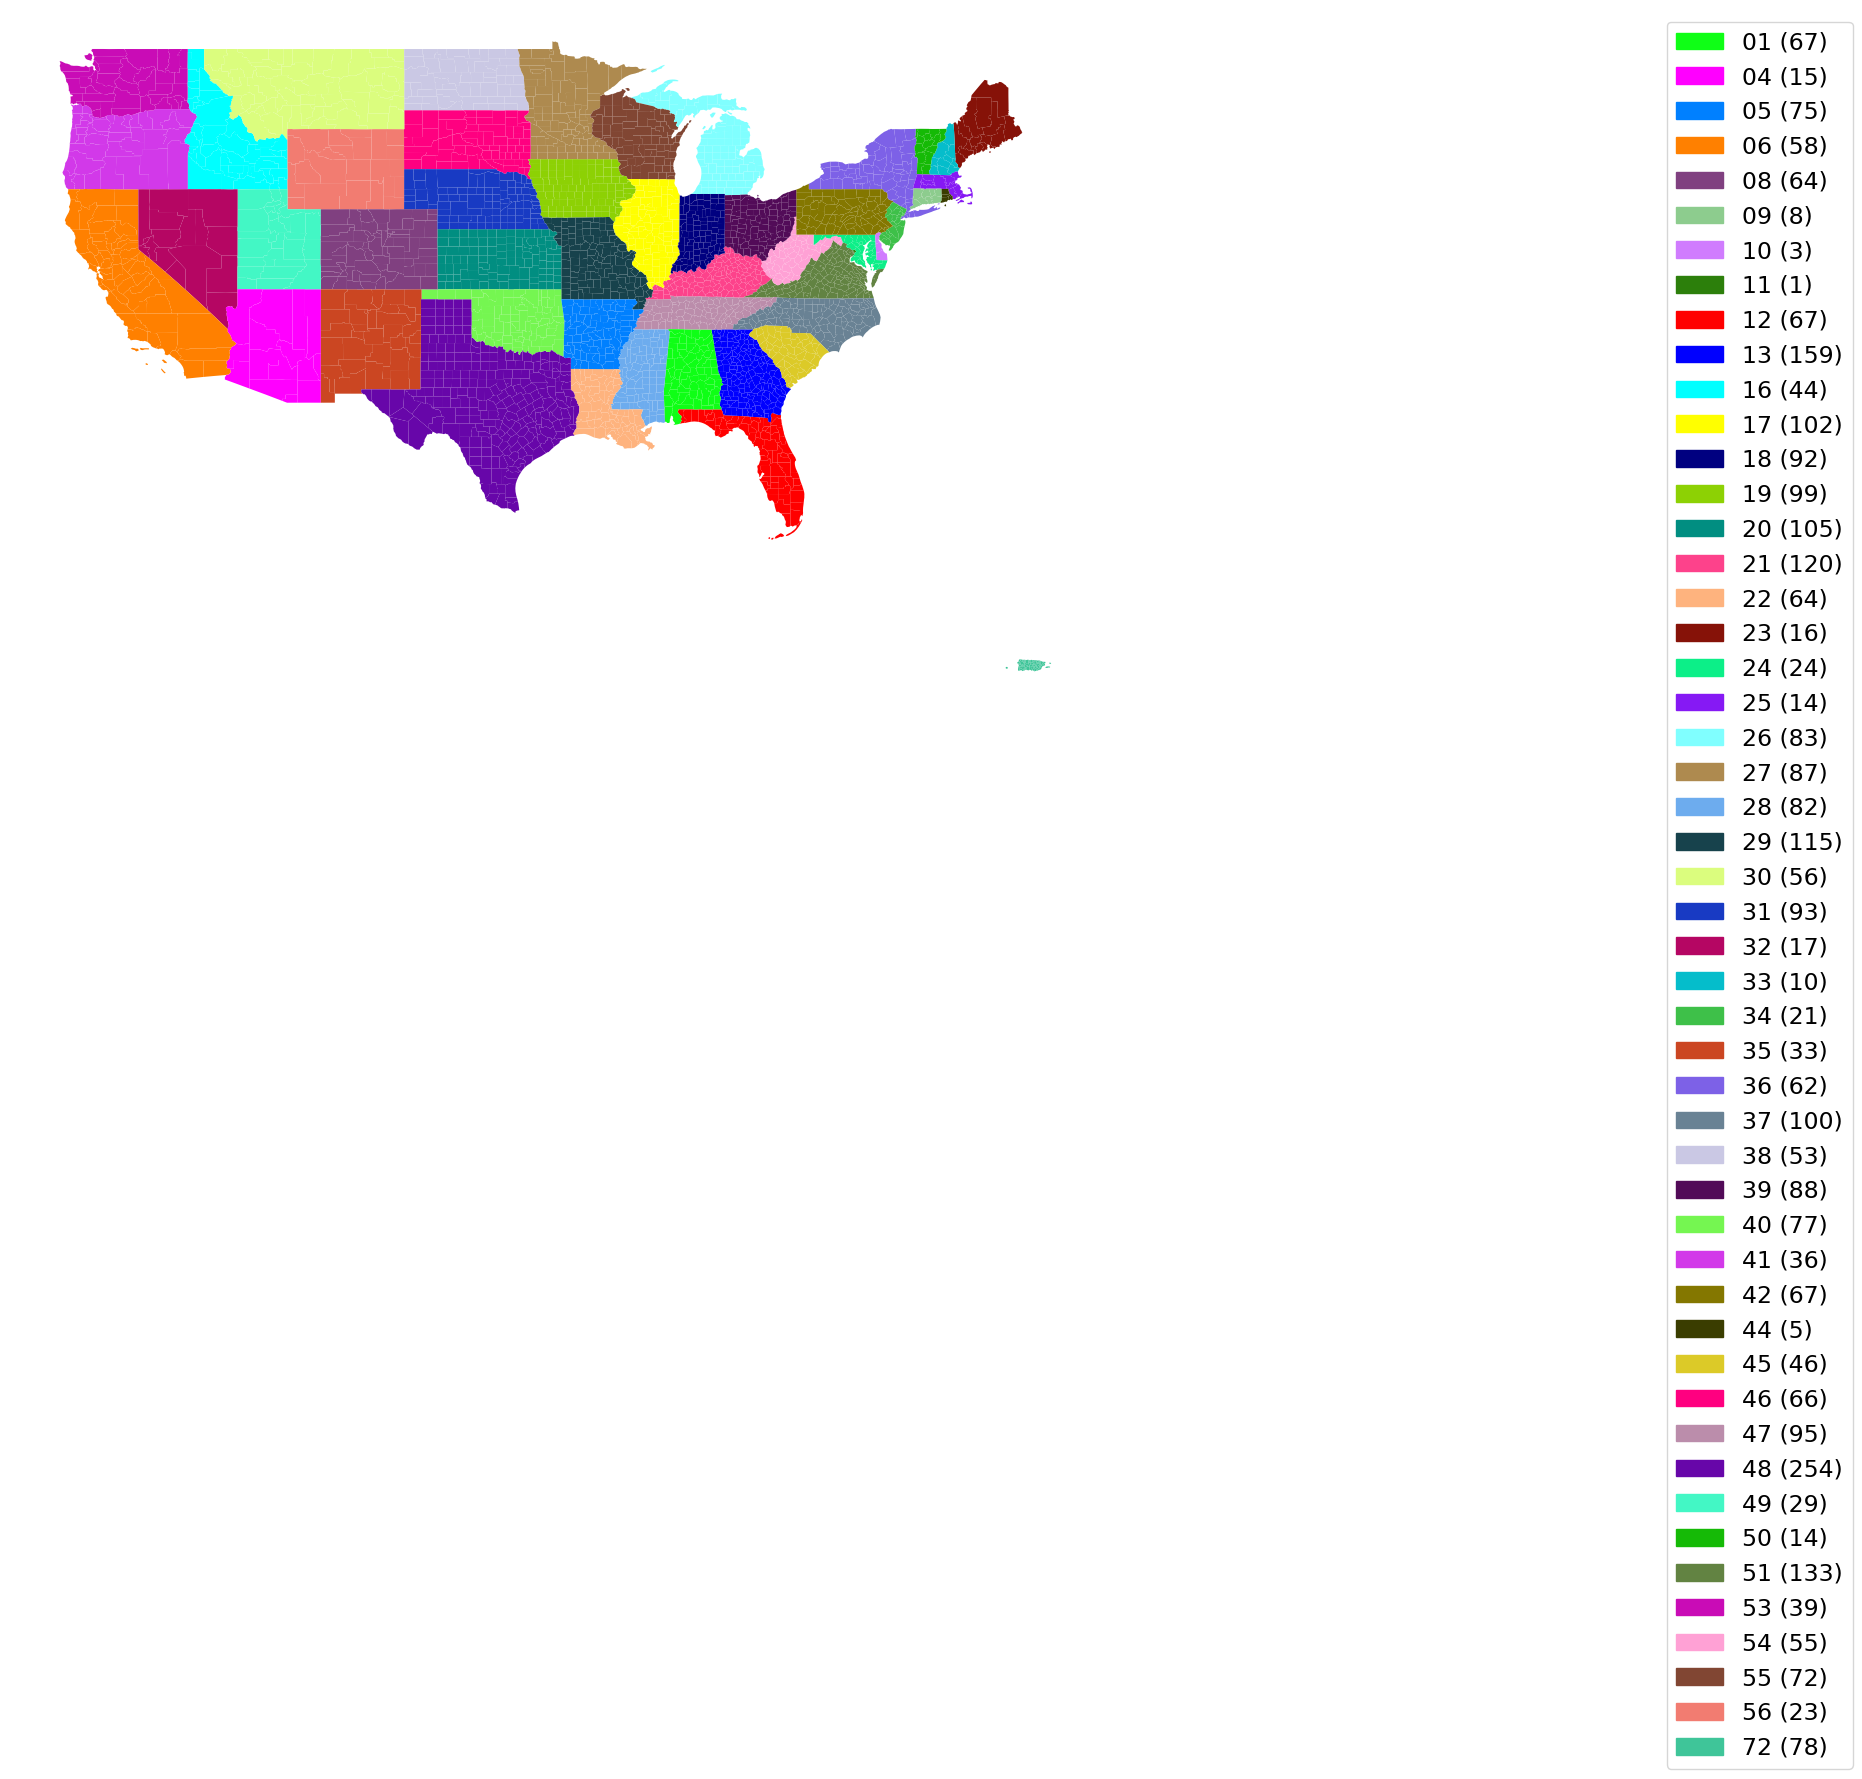

In [23]:
unique_value_choropleth(us, 'STATEFP')

In [27]:
def unique_value_choropleth(gdf, column, figsize=(16, 9),
                           fontsize=17, sort_by_counts=False, ascending=True):
    counts = numpy.unique(gdf[column], return_counts=True)
    values = gdf[column].values
    colors = distinctipy.get_colors(len(counts[0]))
    df = pandas.DataFrame(data = {'label': counts[0], 'counts': counts[1],
                                  'color': colors})
    colors = [colors[numpy.where(counts[0]==i)[0][0]] for i in values]
    gdf.plot(color=colors, figsize=figsize)
    patch_list = []
    w = len(str(df.counts.max()))
    legend_dict = {}
    sort_col = 'label'
    if sort_by_counts:
        sort_col = 'counts'
        
    for index, row in df.sort_values(by=[sort_col], ascending=ascending).iterrows():   
        entry = f'{row["counts"]:>{w}} {row["label"]}'
        entry = f'{row["label"]} ({row["counts"]})'
        #entries.append(entry)
        legend_dict[entry] = row['color']
        data_key = mpatches.Patch(color=row['color'], label=entry)
        patch_list.append(data_key)

    plt.legend(handles=patch_list, bbox_to_anchor=(1.7, 1),loc='upper right',
              fontsize=fontsize);
    plt.axis('off');

    

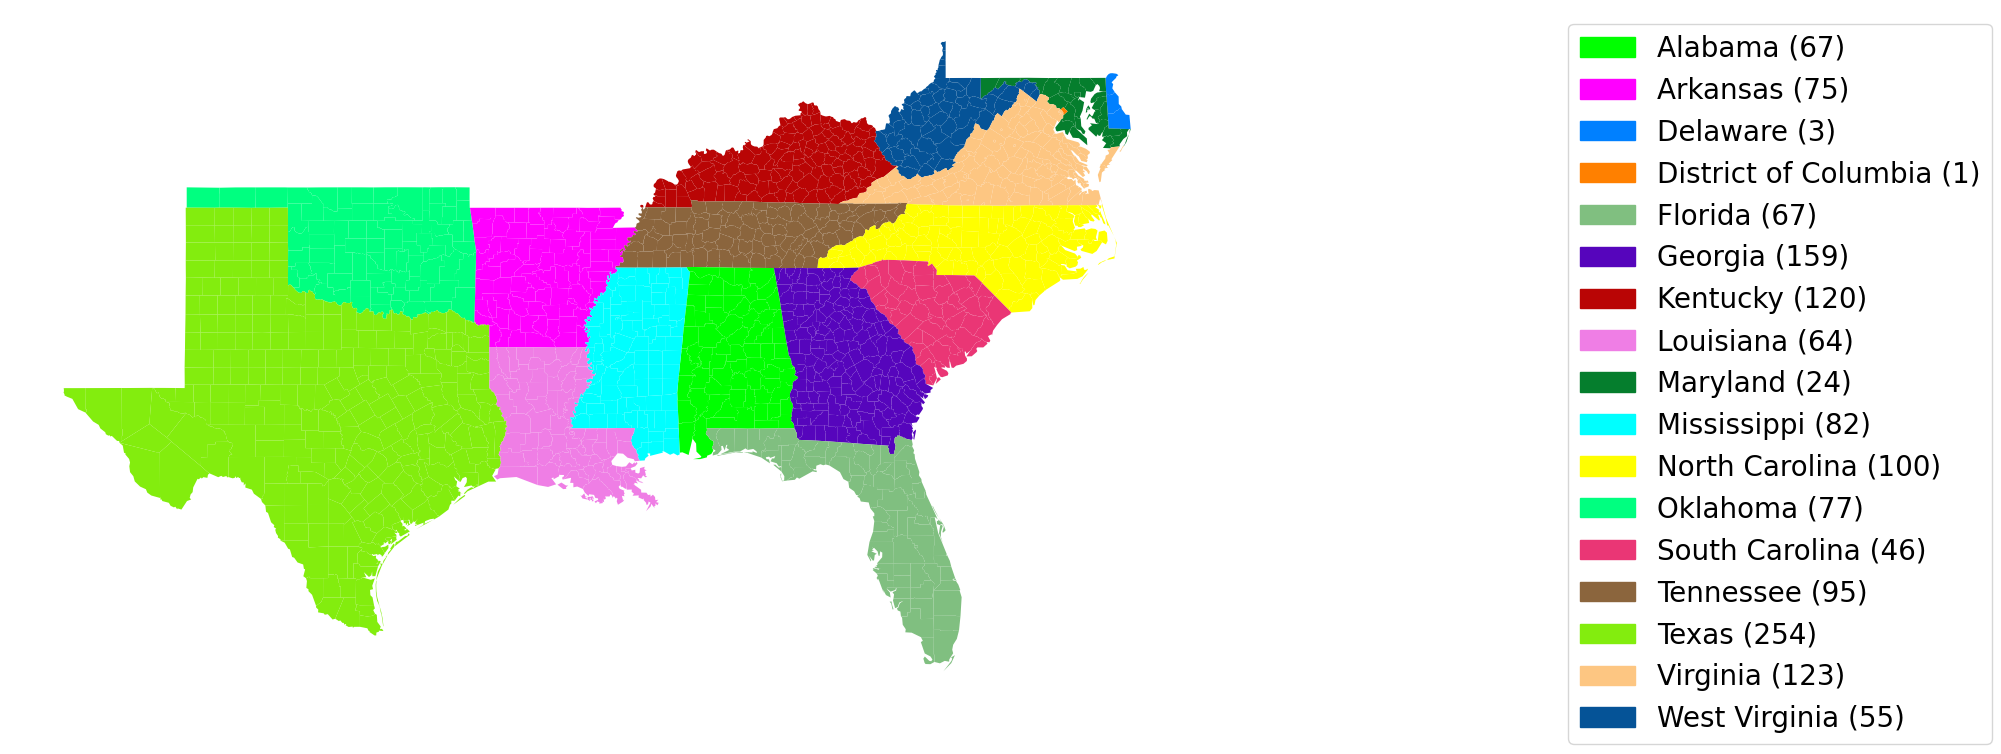

In [28]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20)

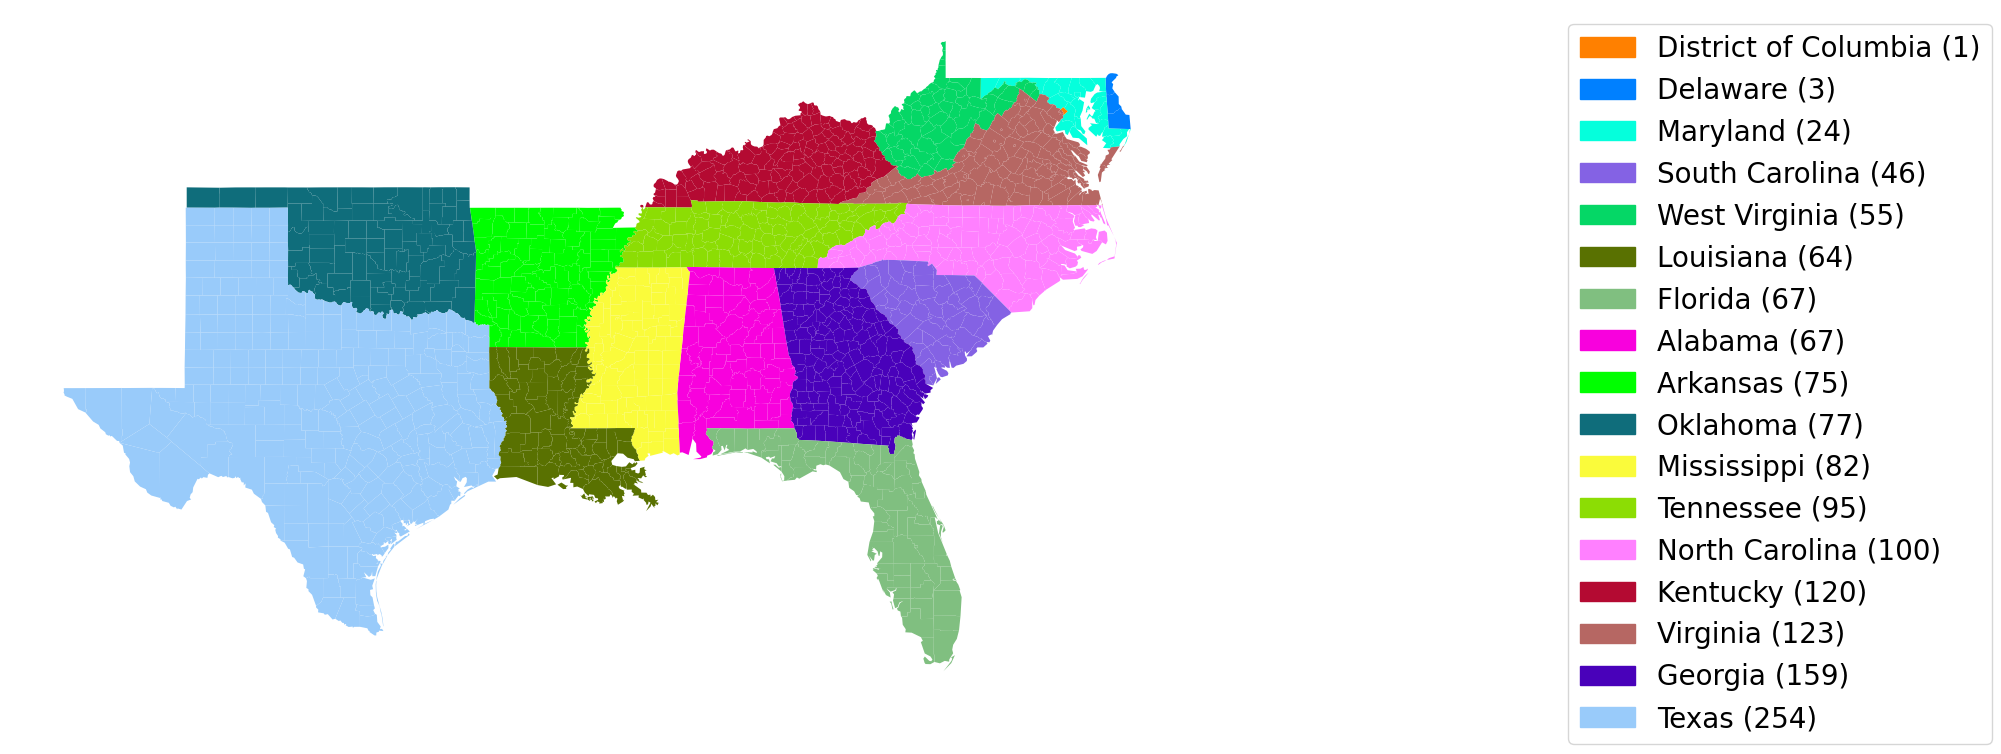

In [29]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20, sort_by_counts=True)

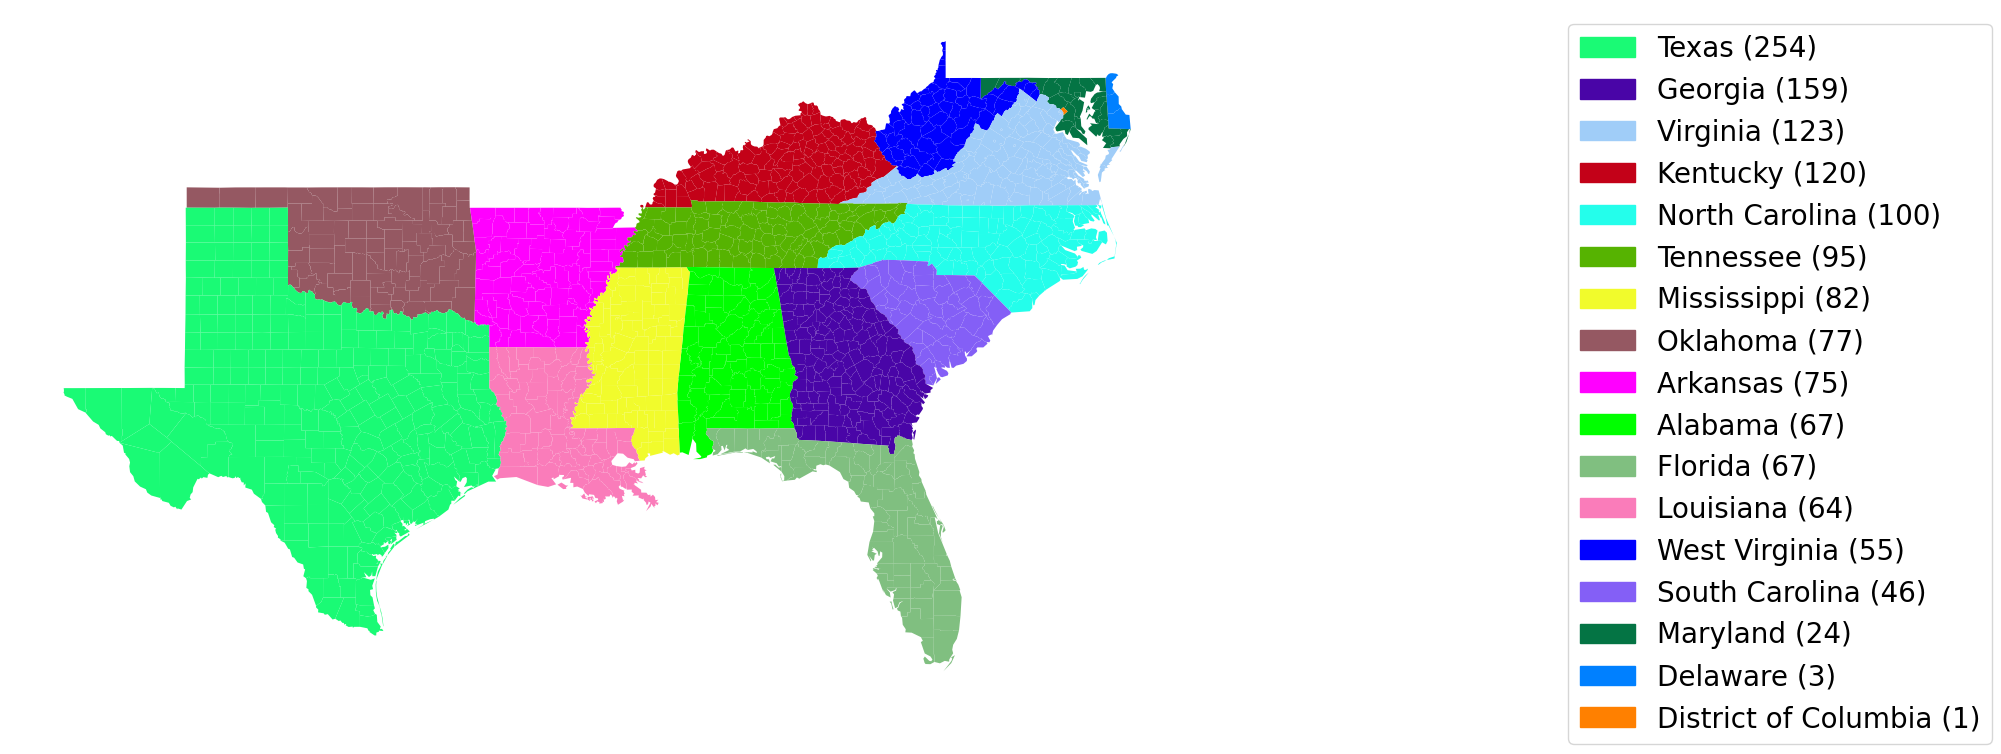

In [30]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20, sort_by_counts=True, ascending=False)

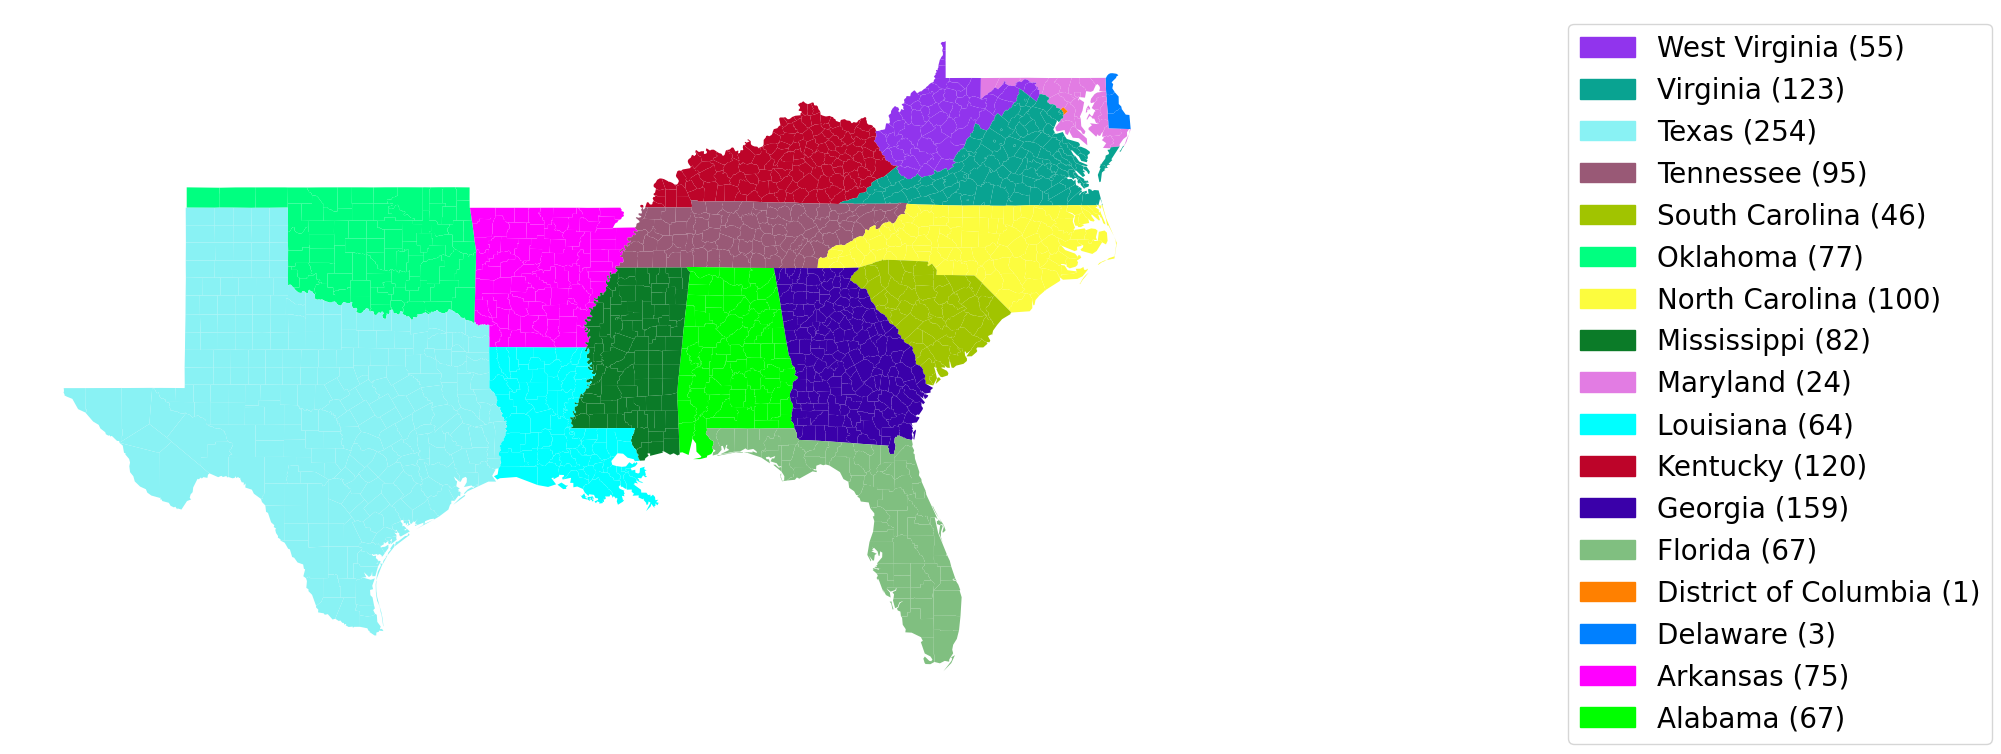

In [31]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20, sort_by_counts=False, ascending=False)